In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, t

# VaR

First, what is VaR. In summary, if the 5\% VaR is \$1 million this is to say that we have a 5\% Probability to loose 1 million dollars. 

But, the problem with VaR is that it doesn't take into account what happens at lower probabilities. For instance, suppose you play a game where you are to win \\$100 with 99\% probability and loose \\$10,000 with 1\% probability.

Now in this situation the 5\% VaR is \\$0 - you have a 5\% probability to loose \\$0, but you have a 1\% probability to loose \\$10,000. As such, the 1\% VaR is \\$10,000

To fix this we look at the Expected Shortfall. While the formula looks pretty complicated, the idea is simple - take averages. So the 5% ES will now take the average of the 5% VaR, 4.999% VaR, 4.998% VaR, ..., 0% VaR. So instead of just looking at 1 VaR, we now take the average of all the VaR below the 5% threshold.

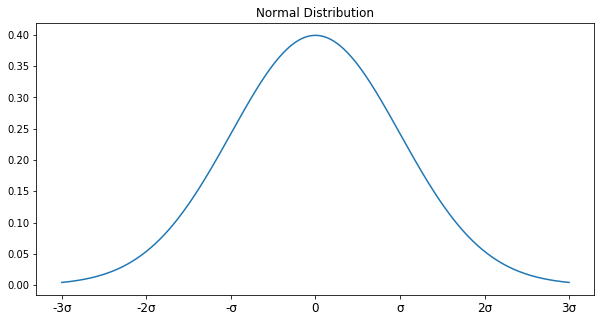

In [2]:
fig = plt.figure(figsize=(10, 5))
x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x));
plt.xticks([-3, -2, -1, 0, 1, 2, 3], ['-3σ', '-2σ', '-σ', '0', 'σ', '2σ', '3σ'], fontsize=12);
plt.title('Normal Distribution');

In [3]:
p = 0.05

print(f'{p} VaR occurs at {format(norm.ppf(p), ".3f")}σ')

0.05 VaR occurs at -1.645σ


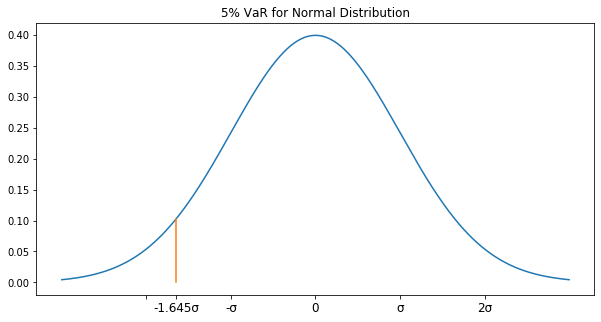

In [4]:
fig = plt.figure(figsize=(10, 5))

x = np.linspace(-3, 3, 1000)
plt.plot(x, norm.pdf(x));

plt.plot([norm.ppf(p), norm.ppf(p)], [0, norm.pdf(norm.ppf(p))])

plt.xticks([-2, norm.ppf(p), -1, 0, 1, 2], 
           ['', f'{format(norm.ppf(p), ".3f")}σ', '-σ', '0', 'σ', '2σ'], fontsize=12);

plt.title(f'{int(p*100)}% VaR for Normal Distribution');

# Students-t
$$t_\nu(0, \sigma^2);\quad \textrm{for } \ \nu=5$$

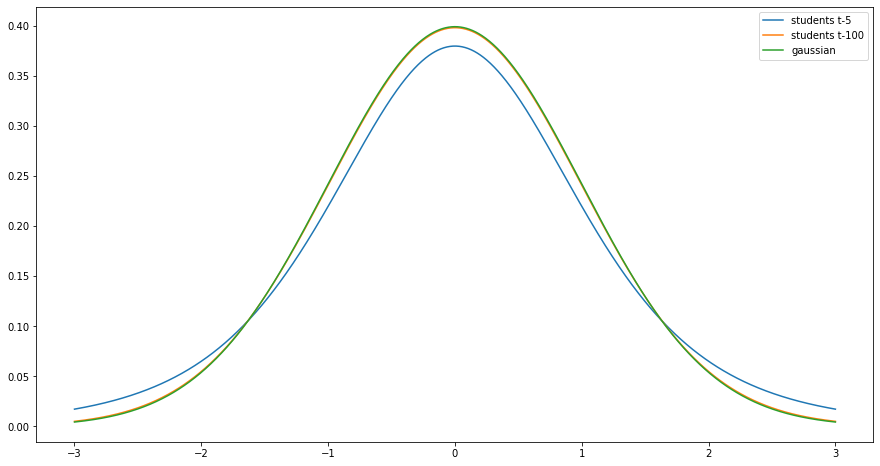

In [19]:
df = 5

fig = plt.figure(figsize=(15, 8))

x = np.linspace(-3, 3, 1000)

for nu in [5, 100]:
    plt.plot(x, t.pdf(x, df=nu), label=f'students t-{nu}');
plt.plot(x, norm.pdf(x), label='gaussian');
plt.legend();

In [6]:
df = 5
p = 0.05

print(f'{p} VaR occurs at {format(t.ppf(p, df=df), ".3f")}σ')

0.05 VaR occurs at -2.015σ


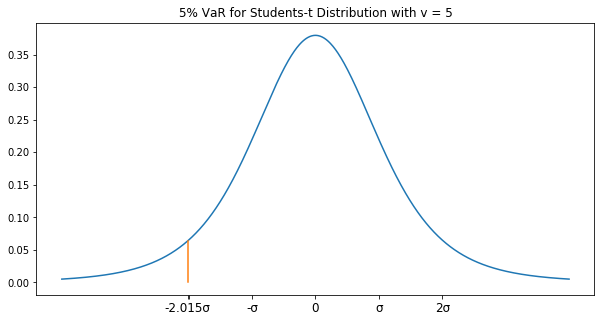

In [7]:
fig = plt.figure(figsize=(10, 5))

x = np.linspace(-4, 4, 1000)
plt.plot(x, t.pdf(x, df=df));

plt.plot([t.ppf(p, df=df), t.ppf(p, df=df)], [0, t.pdf(t.ppf(p, df=df), df=df)])

plt.xticks([-2, t.ppf(p, df=df), -1, 0, 1, 2], 
           ['', f'{format(t.ppf(p, df=df), ".3f")}σ', '-σ', '0', 'σ', '2σ'], fontsize=12);
plt.title(f'{int(p*100)}% VaR for Students-t Distribution with v = {df}');

However, we do not draw from the normal students-t. Instead we are drawing from 

$$a_t\sim\sqrt{\frac{\nu-2}{\nu}}\times t_\nu(0, \sigma_t^2)=\ t_\nu\left(0, \left(\frac{\nu-2}{\nu}\right)\sigma_t^2\right)$$

So for a standard students-t distribution ($t_\nu(0,\sigma^2)$), the 5% VaR occurs at $-2.015\sigma$ (for $\nu=5$). But, because we are drawing from this new distribution, we really need to rewrite

$$\sigma\to\sqrt{\frac{\nu-2}{\nu}}\times\sigma$$

Hence, the 5% VaR for 
$$a_t\sim\sqrt{\frac{\nu-2}{\nu}}\times t_\nu(0, \sigma_t^2)=\ t_\nu\left(0, \left(\frac{\nu-2}{\nu}\right)\sigma_t^2\right)$$
occurs at $-2.015\sqrt{\frac{\nu-2}{\nu}}\times \sigma$ (for $\nu=5$).

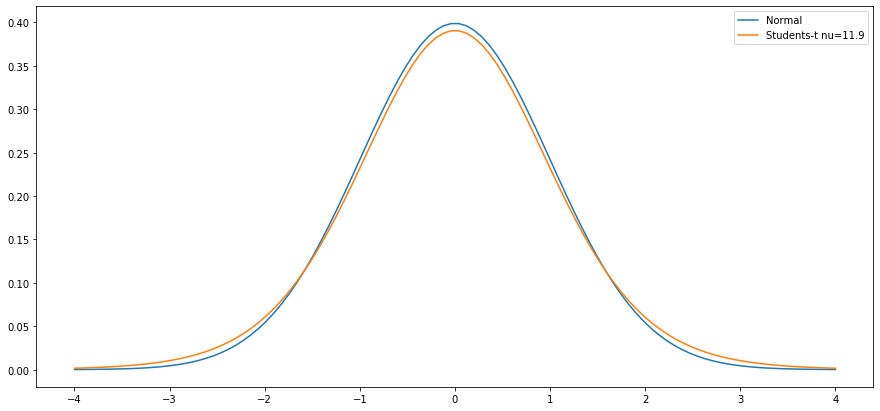

In [28]:
plt.figure(figsize=(15, 7))

df = 11.9
x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x), label='Normal');
plt.plot(x, t.pdf(x, df=df), label=f'Students-t nu={df}');
plt.legend();

ARCH(15) Model
$$r_t=0.06+a_{t-1},\quad a_{t-1}\sim\mathcal{N}(0,\sigma_{t-1}^2)$$

$$\sigma_{t-1}^2=0.75+0.08a_{t-1}^2+0.04a_{t-2}^2+0.09a_{t-3}^2+\cdots$$

---------
$$\sigma_t^2=0.75+0.08a_{t}^2+0.04a_{t-1}^2+0.09a_{t-2}^2+\cdots$$
$$\sigma_{t+1}^2=0.75+0.08a_{t+1}^2+0.04a_{t}^2+0.09a_{t-1}^2+\cdots$$

---------
ARCH(12)-t Model
$$\sigma_{t-1}^2=0.87+0.07a_{t-1}^2+0.04a_{t-2}^2+0.1a_{t-3}^2+\cdots$$

---------
GARCH Model

$$r_t=0.06-0.01r_{t-1}+a_{t-1},\quad a_{t-1}\sim\mathcal{N}(0,\sigma_{t-1}^2)$$

$$\sigma_t^2=0.03+0.94\sigma_{t-1}^2+0.06a_{t-1}^2$$

---------
$$\begin{align}
\sigma_{t+1}^2&=0.03+0.94\sigma_t^2+0.06a_t^2\\
&=0.03+0.94(0.03+0.94\sigma_{t-1}^2+0.06a_{t-1}^2)+0.06a_t^2\\
&=\cdots + 0.94\times0.06 a_{t-1}^2 + \cdots
\end{align}$$

---------
$$\begin{align}
\sigma_{t+2}^2&=0.03+0.94\sigma_{t+1}^2+0.06a_{t+1}^2\\
&=0.03+0.94(\cdots + 0.94\times0.06 a_{t-1}^2 + \cdots)+0.06a_{t+1}^2\\
&=\cdots + 0.94\times0.94\times0.06 a_{t-1}^2 + \cdots\\
&=0.94^2\times0.06 a_{t-1}^2
\end{align}$$

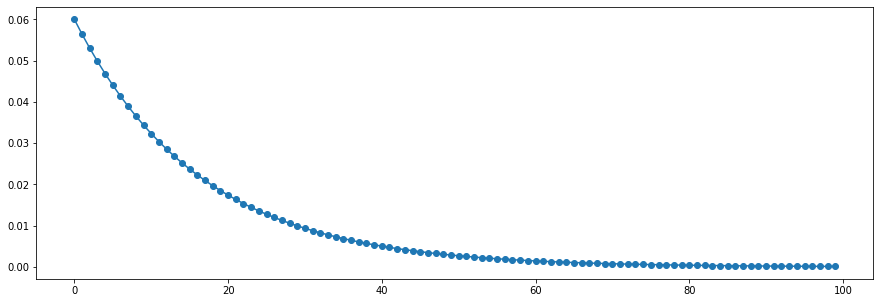

In [9]:
plt.figure(figsize=(15, 5))
x = np.arange(0, 100)
plt.plot(x, 0.06*(0.94**x), 'o-');

In [10]:
18-12

6

$$\sigma_t^2=0.5 + 0.1a_{t-1}^2$$

$$\sigma_t^2=0.5 + 0.1a_{t-1}^2 + 0.2\sigma_{t-1}^2$$